# Diagnostic Test Analysis — Understanding Student Needs from Day One  

This notebook presents a detailed analysis of the diagnostic.  
It aims to:  
1. Identify students’ gaps in key mathematical areas  
2. Define targeted strategies to address them

The diagnostic test was designed to evaluate core mathematical competencies at the beginning of the school year.  
It helps teachers make informed decisions based on actual data rather than general impressions.

This document can also serve as a guide for teachers interested in using data to improve their teaching from the very start.



## 📦 Importing Required Libraries

We begin by importing the Python libraries needed for data manipulation and visualization.


In [2]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


## 📥 Loading Student Results Data

We will now load the diagnostic test results from an Excel file located in the `data/` folder.


In [5]:
# Load each class separately
df_a = pd.read_excel("../data/1APIC3.xlsx")
df_b = pd.read_excel("../data/1APIC4.xlsx")
df_c = pd.read_excel("../data/1APIC5.xlsx")

# Add class labels to each
df_a["Class"] = "Class 1 APIC 3"
df_b["Class"] = "Class 1 APIC 4"
df_c["Class"] = "Class 1 APIC 5"

# Combine all for overall analysis
df_all = pd.concat([df_a, df_b, df_c], ignore_index=True)

## 📑 Test Structure & Data Explanation

The diagnostic test was designed to assess students' fundamental skills in **algebra**, **geometry**, and **problem-solving**. It consisted of six exercises as outlined below:

- **Exercise 1**: Classification of Numbers
  - Students were asked to classify numbers into three categories: integers, decimals, or fractions.
  
- **Exercise 2**: Arithmetic Operations on Different Types of Numbers
  - This exercise tested the ability to perform basic arithmetic operations (addition, subtraction, multiplication, and division) on integers, decimals, and fractions.
  
- **Exercise 3**: Ordering Numbers
  - Students needed to arrange a series of numbers (integers, decimals, and fractions) in ascending or descending order.
  
- **Exercise 4**: Differentiating Between a Line Segment and a Ray
  - This geometry exercise tested students' understanding of geometric figures by asking them to distinguish between a line segment and a ray.
  
- **Exercise 5**: Calculating Measurements of Regular Shapes
  - Students were asked to calculate basic measurements (like perimeter and area) of regular geometric shapes such as squares and triangles.
  
- **Exercise 6**: Proportionality and Percentage Problem
  - The final exercise applied proportionality and percentages in a real-world problem-solving context.

### 🔹 Dataset Columns Explanation:
The dataset consists of the following columns:
- **ID Élève**: The unique identifier for each student (name replaced for data protection).
- **Exercice 1 - Algebra**: The score for the first exercise related to algebra.
- **Exercice 2 - Algebra**: The score for the second exercise related to algebra.
- **Exercice 3 - Algebra**: The score for the third exercise related to algebra.
- **Exercice 4 - Geometry**: The score for the fourth exercise related to geometry.
- **Exercice 5 - Geometry**: The score for the fifth exercise related to geometry.
- **Exercice 6 - Problem Solving**: The score for the final problem-solving exercise.
- **Total Algèbre**: The total points for all algebra exercises.
- **Total Géométrie**: The total points for all geometry exercises.
- **Total Résolution de Problèmes**: The total points for problem-solving exercises.
- **sexe**: The gender of the student, where "M" stands for Male and "F" stands for Female.

### 🔹 Data Preview
Below is a preview of the dataset structure:


In [6]:
# Display first rows
df_all.head()

,ID Élève,sexe,Exercice 1,Exercice 2,Exercice 3,Total Algèbre,Exercice 4,Exercice 5,Total Géométrie,Exercice 6,Total Résolution de Problèmes,Class
0,1,F,3.0,2.0,1.0,6.0,0.0,2.0,2.0,0.0,0.0,Class 1 APIC 3
1,2,M,1.5,1.0,1.5,4.0,0.0,0.0,0.0,0.0,0.0,Class 1 APIC 3
2,3,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Class 1 APIC 3
3,4,F,3.5,6.0,1.5,11.0,0.0,1.0,1.0,1.0,1.0,Class 1 APIC 3
4,5,F,3.5,3.0,1.5,8.0,0.0,2.0,2.0,0.0,0.0,Class 1 APIC 3


## 👥 Class Demographics Analysis

In this section, we analyze the structure of the student population across the three classes that took the diagnostic test. The goal is to understand the distribution of students by class and by gender (Boys and girls).

We calculate:
- The total number of students in each class.
- The number of male and female students in each class.
- Overall totals across all classes.

This information helps identify potential gender imbalances and ensures a fair and inclusive analysis.

In [24]:
# Create a summary list
summary = []

# Loop through each class and collect data
for name, df in {
    '1 APIC 3': df_a,
    '1 APIC 4': df_b,
    '1 APIC 5': df_c
}.items():
    total = len(df)
    males = (df['sexe'] == 'M').sum()
    females = (df['sexe'] == 'F').sum()
    summary.append([name, males, females, total])

# Add total row
total_all = sum(row[3] for row in summary)
total_males = sum(row[1] for row in summary)
total_females = sum(row[2] for row in summary)
summary.append(['Total', total_males, total_females, total_all])

# Create DataFrame
df_summary = pd.DataFrame(summary, columns=['Class', 'Males', 'Females', 'Total'])

# Display the table
df_summary.style.hide(axis="index")


Class,Males,Females,Total
1 APIC 3,17,14,31
1 APIC 4,20,11,31
1 APIC 5,18,13,31
Total,55,38,93


### Gender Distribution per Class (Donut Chart)

To better understand the gender composition in each class, we visualize the number of male and female students using a donut chart. This type of visualization helps highlight the proportion of each gender clearly and is useful for identifying potential imbalances that could influence group dynamics or learning approaches.


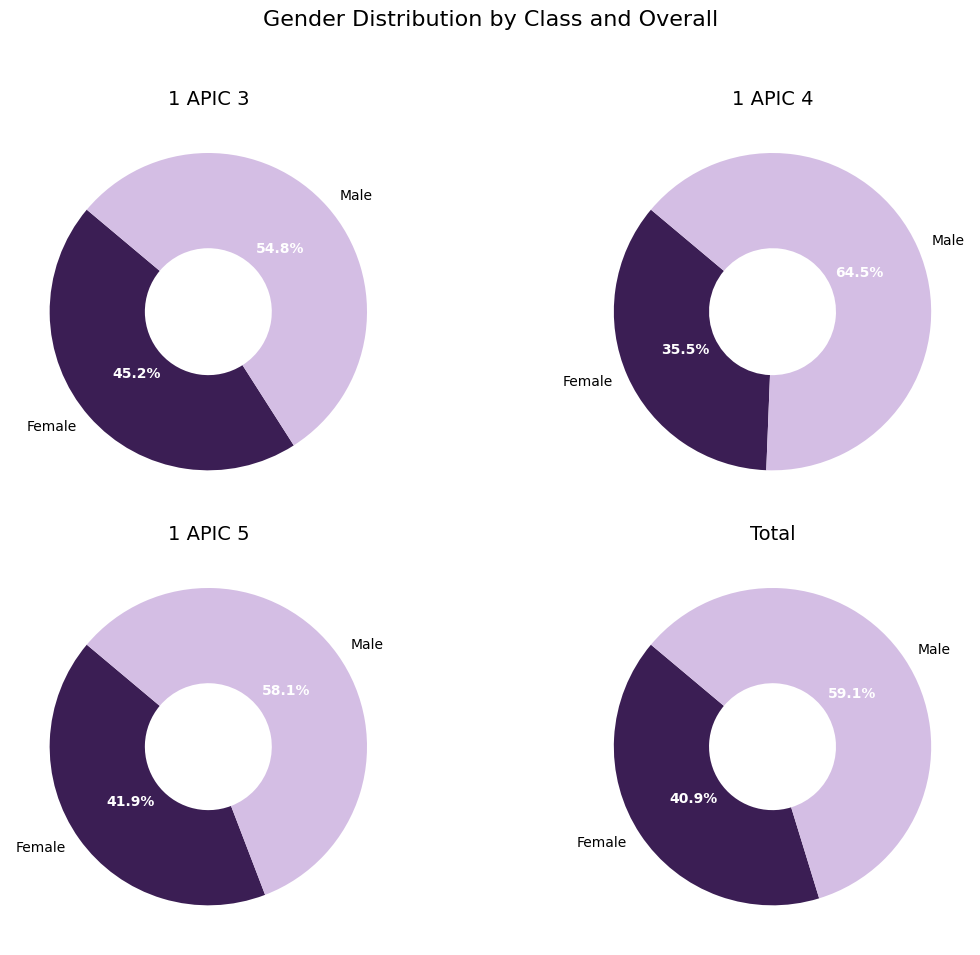

In [22]:
# List of DataFrames for each class
class_data = [df_a, df_b, df_c, df_all]
class_names = ['1 APIC 3', '1 APIC 4', '1 APIC 5', 'Total']

# Define plot style
colors = ['#3B1E54', '#D4BEE4']
labels = ['Female', 'Male']

# Create 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily iterate

# Generate donut plots
for i, (df, title) in enumerate(zip(class_data, class_names)):
    counts = df['sexe'].value_counts()
    values = [counts.get('F', 0), counts.get('M', 0)]

    wedges, texts, autotexts = axes[i].pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        wedgeprops={'width': 0.6}
    )
        
    axes[i].set_title(f'{title}', fontsize=14)
    plt.setp(autotexts, size=10, weight='bold', color='white')

# Hide unused subplot if needed (in case less than 4)
if len(class_data) < 4:
    for j in range(len(class_data), 4):
        fig.delaxes(axes[j])

# Add overall title and layout adjustments
plt.suptitle('Gender Distribution by Class and Overall', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Analyzing Student Attendance

Next, we look at **student attendance during the diagnostic test** by identifying missing data (NaN values) in the result sheets. These missing values typically correspond to students who were **absent** during the test. We summarize this data per class and overall, and visualize it using a grouped bar chart showing:

- The **total number of students** enrolled per class.
- The **number of present students** (i.e., those who submitted complete test data).

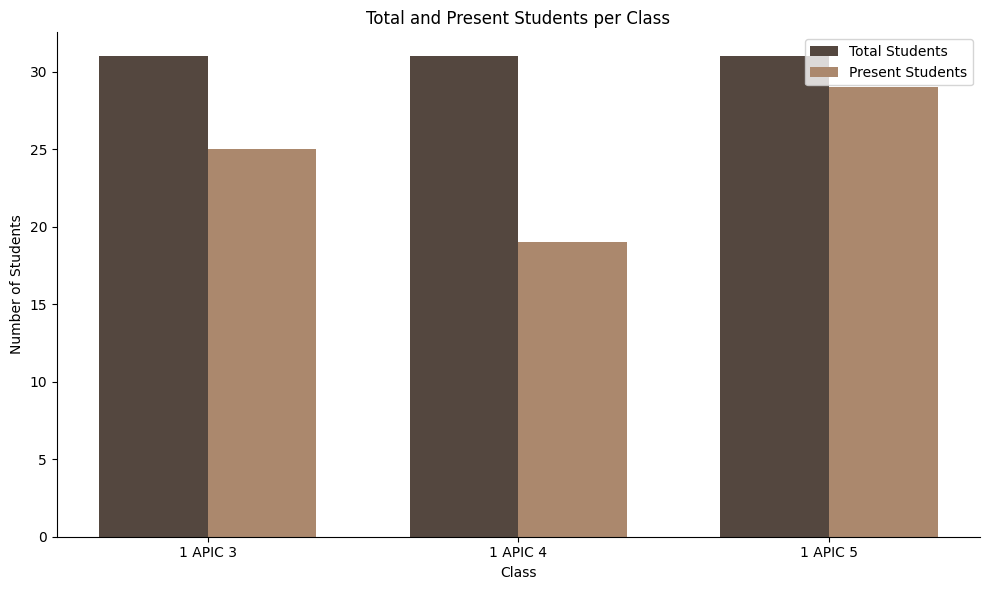

In [ ]:
# Count total and present students per class
def count_attendance(df):
    total = len(df)
    present = df.dropna().shape[0]  # rows without any NaN
    return total, present

totals_apic1_3 = count_attendance(df_a)
totals_apic1_4 = count_attendance(df_b)
totals_apic1_5 = count_attendance(df_c)

# Labels for classes
labels = ['1 APIC 3', '1 APIC 4', '1 APIC 5']
total_entries = [totals_apic1_3[0], totals_apic1_4[0], totals_apic1_5[0]]
non_nan_counts = [totals_apic1_3[1], totals_apic1_4[1], totals_apic1_5[1]]

# Set up the bar plot
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
ax.bar(x, total_entries, width, label='Total Students', color='#54473F')
ax.bar([p + width for p in x], non_nan_counts, width, label='Present Students', color='#AB886D')

# Styling

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Class')
ax.set_ylabel('Number of Students')
ax.set_title('Total and Present Students per Class')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### **Feedback on the Classes Structure**

Upon analyzing the **gender distribution** across the three classes, we observe a consistent trend: **the number of boys exceeds the number of girls** in all three classes. This might suggest a gender imbalance in the classroom composition, which could be useful information when planning differentiated teaching strategies or group activities.

Moreover, regarding **student attendance**, the data indicates that the number of **absent students** is quite low in each class. This is a positive sign, indicating that most students were present for the diagnostic test. The low number of absentees suggests a high level of student engagement and commitment, which is crucial for accurate assessment of their skills and abilities at the start of the year. Therefore, this dataset seems to reflect our classes perfectly, giving us a reliable foundation for further analysis and action.

This analysis provides valuable insight into the composition and engagement of the students, helping us make informed decisions about targeted interventions and teaching methods. 


In [ ]:
# Concatenate the DataFrames
Apic1 = pd.concat([Apic1_3, Apic1_4, Apic1_5], ignore_index=True)

,Etudiant,sexe,Ex 1,Ex 2,Ex 3,TOTAL algebre,Ex4,Ex 5,TOTAL geomery,Ex 6,TOTAL problem
0,HALMNECH KENZA,F,3.0,2.0,1.0,6.0,0.0,2.0,2.0,0.0,0.0
1,MAJIDI RAYANE,M,1.5,1.0,1.5,4.0,0.0,0.0,0.0,0.0,0.0
2,Ait obella Choura,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMGHAR YASMINE,F,3.5,6.0,1.5,11.0,0.0,1.0,1.0,1.0,1.0
4,HERAID ASMA,F,3.5,3.0,1.5,8.0,0.0,2.0,2.0,0.0,0.0


In [ ]:
Apic1['Total'] = Apic1['TOTAL algebre']+Apic1['TOTAL geomery']+Apic1['TOTAL problem']

In [ ]:
Apic1.shape

(93, 12)

In [ ]:
Apic1.head()

,Etudiant,sexe,Ex 1,Ex 2,Ex 3,TOTAL algebre,Ex4,Ex 5,TOTAL geomery,Ex 6,TOTAL problem,Total
0,HALMNECH KENZA,F,3.0,2.0,1.0,6.0,0.0,2.0,2.0,0.0,0.0,8.0
1,MAJIDI RAYANE,M,1.5,1.0,1.5,4.0,0.0,0.0,0.0,0.0,0.0,4.0
2,Ait obella Choura,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMGHAR YASMINE,F,3.5,6.0,1.5,11.0,0.0,1.0,1.0,1.0,1.0,13.0
4,HERAID ASMA,F,3.5,3.0,1.5,8.0,0.0,2.0,2.0,0.0,0.0,10.0


In [ ]:
Apic2_5.describe()

,Ex 1,Ex 2,Ex 3,Ex4,TOTAL algebre,Ex 5,TOTAL geomery,Ex 6,TOTAL problem
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000
mean,1.066667,3.333333,1.066667,0.833333,6.300000,1.266667,1.266667,0.120690,0.120690
std,0.552944,1.093345,0.907187,0.833908,1.887344,1.257620,1.257620,0.288319,0.288319
min,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.500000,1.000000,1.000000,6.250000,1.000000,1.000000,0.000000,0.000000
75%,1.500000,4.000000,2.000000,1.750000,7.875000,2.750000,2.750000,0.000000,0.000000
max,2.000000,5.000000,3.000000,2.000000,10.000000,3.000000,3.000000,1.000000,1.000000


In [ ]:
Apic1.describe()

,Ex 1,Ex 2,Ex 3,TOTAL algebre,Ex4,Ex 5,TOTAL geomery,Ex 6,TOTAL problem,Total
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,2.726027,3.438356,1.489726,7.654110,0.191781,0.760274,0.952055,0.277397,0.256849,8.863014
std,1.163809,1.563350,0.996904,2.743246,0.544098,0.854358,1.038042,0.466893,0.460172,3.539470
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,1.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000
50%,3.500000,3.000000,1.500000,8.000000,0.000000,0.500000,0.500000,0.000000,0.000000,8.500000
75%,3.500000,5.000000,2.000000,10.000000,0.000000,1.500000,2.000000,0.500000,0.500000,11.500000
max,3.500000,6.000000,3.000000,12.500000,2.000000,2.500000,4.500000,1.500000,1.500000,17.500000


In [ ]:
import seaborn as sns

In [ ]:
Apic1_3_cop =  Apic1_3.copy()
Apic1_4_cop =  Apic1_4.copy()
Apic1_5_cop =  Apic1_5.copy()

# Adding a 'CLASS' column to each DataFrame
Apic1_3_cop['Class'] = '1apic3'
Apic1_4_cop['Class'] = '1apic4'
Apic1_5_cop['Class'] = '1apic5'

# Concatenate the DataFrames
Apic1 = pd.concat([Apic1_3_cop, Apic1_4_cop, Apic1_5_cop], ignore_index=True)
Apic1['Total'] = Apic1['TOTAL algebre']+Apic1['TOTAL geomery']+Apic1['TOTAL problem']
Apic1.head()

,Etudiant,sexe,Ex 1,Ex 2,Ex 3,TOTAL algebre,Ex4,Ex 5,TOTAL geomery,Ex 6,TOTAL problem,Class,Total
0,HALMNECH KENZA,F,3.0,2.0,1.0,6.0,0.0,2.0,2.0,0.0,0.0,1apic3,8.0
1,MAJIDI RAYANE,M,1.5,1.0,1.5,4.0,0.0,0.0,0.0,0.0,0.0,1apic3,4.0
2,Ait obella Choura,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1apic3,NaN
3,AMGHAR YASMINE,F,3.5,6.0,1.5,11.0,0.0,1.0,1.0,1.0,1.0,1apic3,13.0
4,HERAID ASMA,F,3.5,3.0,1.5,8.0,0.0,2.0,2.0,0.0,0.0,1apic3,10.0


In [ ]:
Apic1.shape

(93, 13)

In [ ]:
import matplotlib.patches as mpatches

In [ ]:
Apic2_5['Total'] = Apic2_5['TOTAL algebre']+Apic2_5['TOTAL geomery']+Apic2_5['TOTAL problem']

In [ ]:
# Define custom colors for girls and boys
custom_palette = {'F': '#EAD8B1', 'M': '#3A6D8C'}  # Pink for Girls and Blue for Boys

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=Apic1, x='Class', y='Total', hue='sexe', split=True, inner='quart', palette=custom_palette)

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize the plot
plt.title('Performance des étudiants par class')
plt.ylabel('Performance')
plt.legend(title='Genre')

# Create custom legend handles
girls_patch = mpatches.Patch(color=custom_palette['F'], label='Filles')
boys_patch = mpatches.Patch(color=custom_palette['M'], label='Garçons')

# Update the legend
plt.legend(title='Gender', handles=[girls_patch, boys_patch], framealpha=0)

# Display the plot
plt.show()

NameError: name 'Apic1' is not defined

<Figure size 1000x600 with 0 Axes>

NameError: name 'mpatches' is not defined

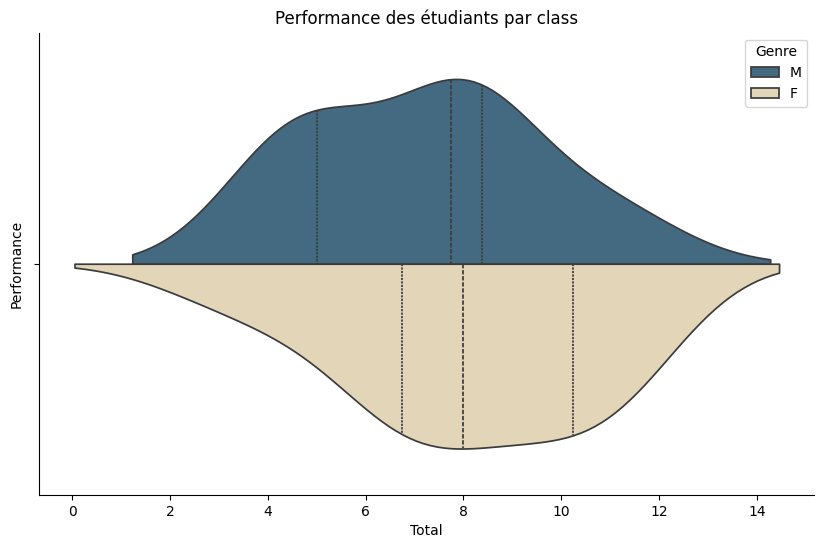

In [ ]:
# Define custom colors for girls and boys
custom_palette = {'F': '#EAD8B1', 'M': '#3A6D8C'}  # Pink for Girls and Blue for Boys

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=Apic2_5, x='Total', hue='sexe', split=True, inner='quart', palette=custom_palette)

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize the plot
plt.title('Performance des étudiants par class')
plt.ylabel('Performance')
plt.legend(title='Genre')

# Create custom legend handles
girls_patch = mpatches.Patch(color=custom_palette['F'], label='Filles')
boys_patch = mpatches.Patch(color=custom_palette['M'], label='Garçons')

# Update the legend
plt.legend(title='Gender', handles=[girls_patch, boys_patch], framealpha=0)

# Display the plot
plt.show()

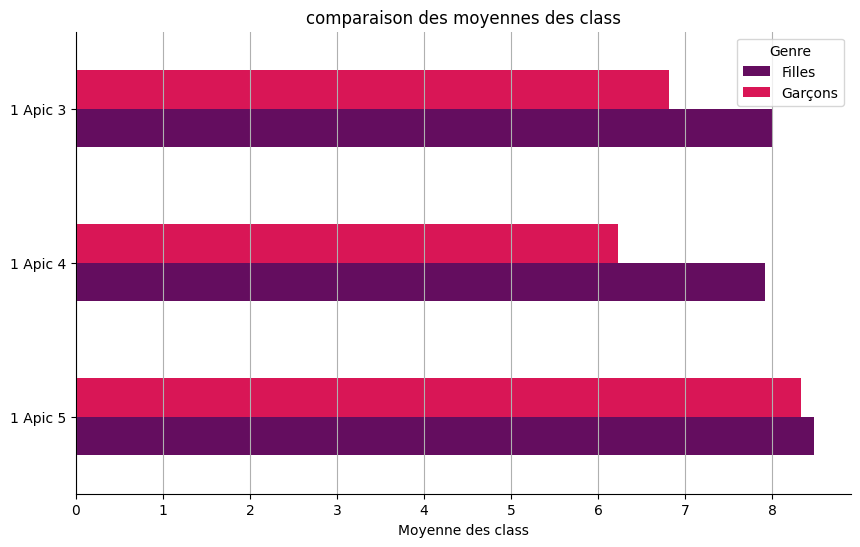

In [ ]:
# Calculate average performance for girls and boys in each DataFrame
averages_alg = {
    '1 Apic 5': Apic1_5.groupby('sexe')['TOTAL algebre'].mean(),
    '1 Apic 4': Apic1_4.groupby('sexe')['TOTAL algebre'].mean(),
    '1 Apic 3': Apic1_3.groupby('sexe')['TOTAL algebre'].mean()
}

# Convert the averages dictionary into a DataFrame for easier plotting
averages_alg_df = pd.DataFrame(averages_alg).T

# Plotting
plt.figure(figsize=(10, 6))
averages_alg_df.plot(kind='barh', ax=plt.gca(), color=['#640D5F', '#D91656'])

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Moyenne des class')
plt.title('comparaison des moyennes des class')
plt.legend(title='Genre', labels=['Filles', 'Garçons'])
plt.grid(axis='x')
plt.show()

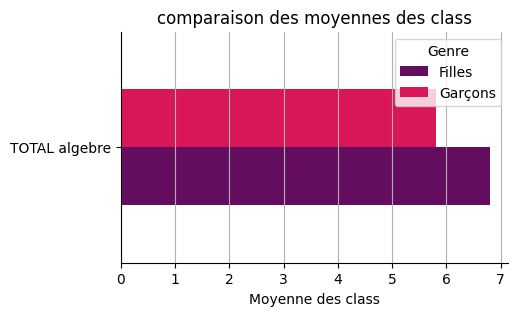

In [ ]:
# Calculate average performance for girls and boys in each DataFrame
averages_alg_2_5 = Apic2_5.groupby('sexe')['TOTAL algebre'].mean()
    


# Convert the averages dictionary into a DataFrame for easier plotting
averages_alg_df = pd.DataFrame(averages_alg_2_5).T

# Plotting
plt.figure(figsize=(5, 3))
averages_alg_df.plot(kind='barh', ax=plt.gca(), color=['#640D5F', '#D91656'])

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Moyenne des class')
plt.title('comparaison des moyennes des class')
plt.legend(title='Genre', labels=['Filles', 'Garçons'])
plt.grid(axis='x')
plt.show()

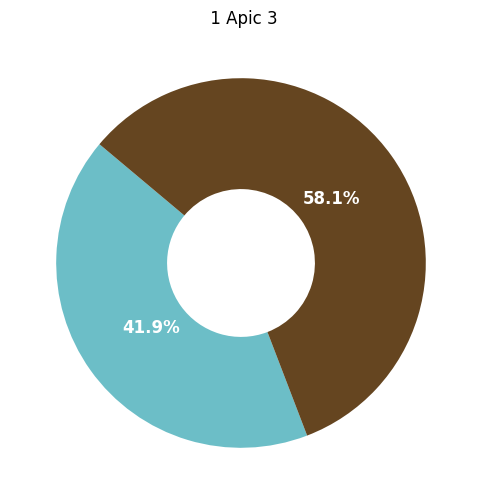

In [ ]:
# Count the number of students with scores above 6 and 6 or below
above_average = (Apic1_3['TOTAL algebre'] > 7).sum()
below_or_equal_average = len(Apic1_3) - above_average
    
# Data for the pie chart
values = [above_average, below_or_equal_average]
labels = ['maîtrise', 'ne maîtrise pas']
colors = ['#FF69B4', '#87CEEB']
    
# Create the donut chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(values, autopct='%1.1f%%', 
                                    colors=['#6CBEC7','#654520'], startangle=140, 
                                    wedgeprops={'width': 0.6})  # Increase width for thicker donut


plt.title(' 1 Apic 3')
plt.gca().set_aspect('equal')
# Customizing the appearance
plt.setp(autotexts, size=12, weight='bold', color='white')  # Style for percentage text


    
# Show the plot
plt.show()

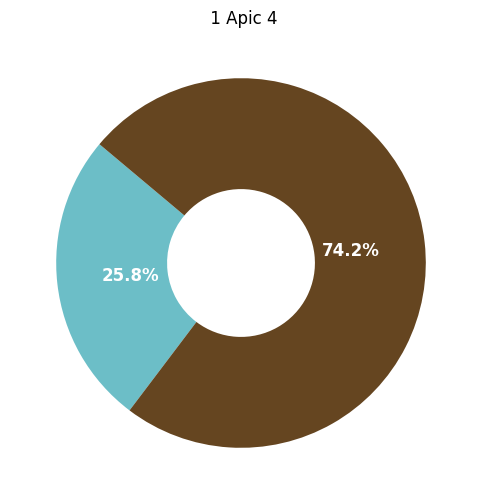

In [ ]:
# Count the number of students with scores above 6 and 6 or below
above_average = (Apic1_4['TOTAL algebre'] > 7).sum()
below_or_equal_average = len(Apic1_4) - above_average
    
# Data for the pie chart
values = [above_average, below_or_equal_average]
labels = ['maîtrise', 'ne maîtrise pas']
colors = ['#FF69B4', '#87CEEB']
    
# Create the donut chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(values, autopct='%1.1f%%', 
                                    colors=['#6CBEC7','#654520'], startangle=140, 
                                    wedgeprops={'width': 0.6})  # Increase width for thicker donut


plt.title(' 1 Apic 4')
plt.gca().set_aspect('equal')
# Customizing the appearance
plt.setp(autotexts, size=12, weight='bold', color='white')  # Style for percentage text
    
# Show the plot
plt.show()

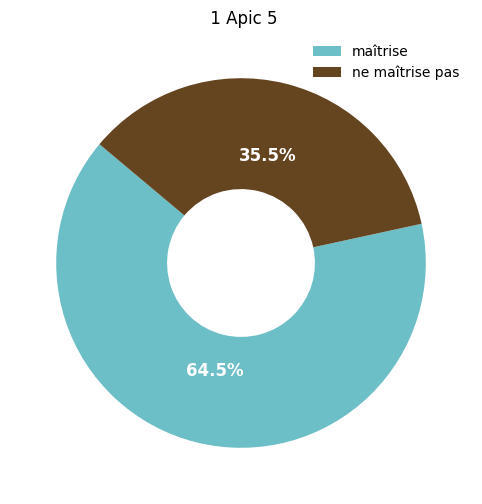

In [ ]:
# Count the number of students with scores above 6 and 6 or below
above_average = (Apic1_5['TOTAL algebre'] > 7).sum()
below_or_equal_average = len(Apic1_5) - above_average
    
# Data for the pie chart
values = [above_average, below_or_equal_average]
labels = ['maîtrise', 'ne maîtrise pas']
colors = ['#FF69B4', '#87CEEB']
    
# Create the donut chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(values, autopct='%1.1f%%', 
                                    colors=['#6CBEC7','#654520'], startangle=140, 
                                    wedgeprops={'width': 0.6})  # Increase width for thicker donut

# Add legend with transparent background
plt.legend(wedges, labels, loc='upper right', framealpha=0)

plt.title(' 1 Apic 5')
plt.gca().set_aspect('equal')
# Customizing the appearance
plt.setp(autotexts, size=12, weight='bold', color='white')  # Style for percentage text
    
# Show the plot
plt.show()

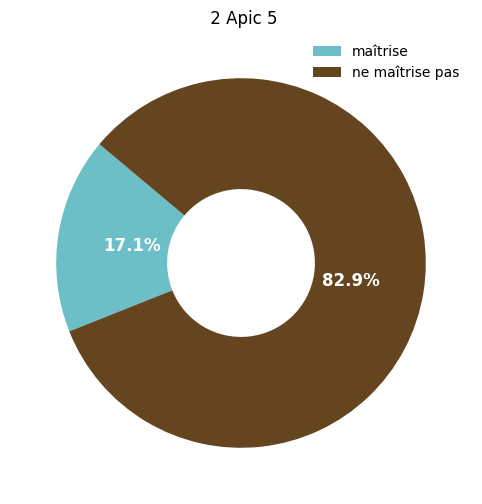

In [ ]:
# Count the number of students with scores above 6 and 6 or below
above_average = (Apic2_5['TOTAL algebre'] > 8).sum()
below_or_equal_average = len(Apic2_5) - above_average
    
# Data for the pie chart
values = [above_average, below_or_equal_average]
labels = ['maîtrise', 'ne maîtrise pas']
colors = ['#FF69B4', '#87CEEB']
    
# Create the donut chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(values, autopct='%1.1f%%', 
                                    colors=['#6CBEC7','#654520'], startangle=140, 
                                    wedgeprops={'width': 0.6})  # Increase width for thicker donut

# Add legend with transparent background
plt.legend(wedges, labels, loc='upper right', framealpha=0)

plt.title(' 2 Apic 5')
plt.gca().set_aspect('equal')
# Customizing the appearance
plt.setp(autotexts, size=12, weight='bold', color='white')  # Style for percentage text
    
# Show the plot
plt.show()

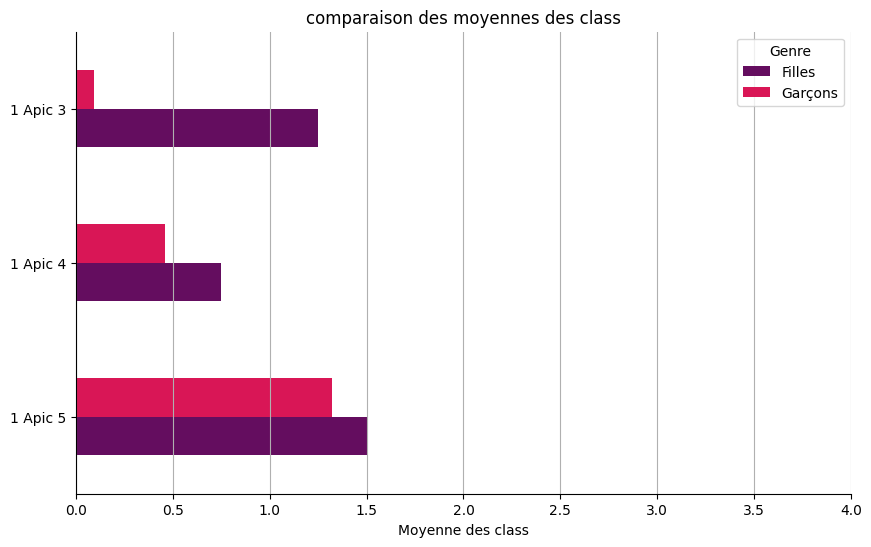

In [ ]:
# Calculate average performance for girls and boys in each DataFrame
averages_geo = {
    '1 Apic 5': Apic1_5.groupby('sexe')['TOTAL geomery'].mean(),
    '1 Apic 4': Apic1_4.groupby('sexe')['TOTAL geomery'].mean(),
    '1 Apic 3': Apic1_3.groupby('sexe')['TOTAL geomery'].mean()
}

# Convert the averages dictionary into a DataFrame for easier plotting
averages_geo_df = pd.DataFrame(averages_geo).T

# Plotting
plt.figure(figsize=(10, 6))
averages_geo_df.plot(kind='barh', ax=plt.gca(), color=['#640D5F', '#D91656'])

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the x-axis limit to a specified value (e.g., 12)
plt.xlim(0, 4)

# Add labels and title
plt.xlabel('Moyenne des class')
plt.title('comparaison des moyennes des class')
plt.legend(title='Genre', labels=['Filles', 'Garçons'])
plt.grid(axis='x')
plt.show()

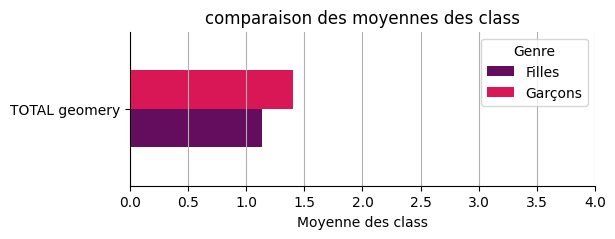

In [ ]:
# Calculate average performance for girls and boys in each DataFrame
averages_geo_2_5 =  Apic2_5.groupby('sexe')['TOTAL geomery'].mean()
    

# Convert the averages dictionary into a DataFrame for easier plotting
averages_geo_df = pd.DataFrame(averages_geo_2_5).T

# Plotting
plt.figure(figsize=(6, 2))
averages_geo_df.plot(kind='barh', ax=plt.gca(), color=['#640D5F', '#D91656'])

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the x-axis limit to a specified value (e.g., 12)
plt.xlim(0, 4)

# Add labels and title
plt.xlabel('Moyenne des class')
plt.title('comparaison des moyennes des class')
plt.legend(title='Genre', labels=['Filles', 'Garçons'])
plt.grid(axis='x')
plt.show()